# Classify Images Using Neural Networks

# Data

Использованием фреймворк *Keras* гугловской библиотеки *Tensorflow* для нейронных сетей

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

Будем строить нейронные сети для датасета *fashion MNIST*, который содержит изображения 10 видов одежды. 60000 изображений в обучающем наборе и 10000 в тестовом. Изображения 28*28

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape

(60000, 28, 28)

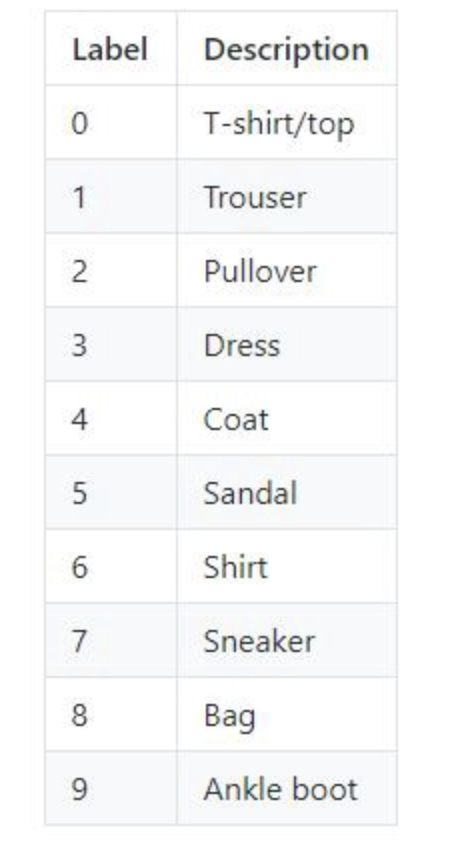

In [3]:
from IPython.display import Image
Image(filename='pics/pic.png',width=300) 

<Figure size 432x288 with 0 Axes>

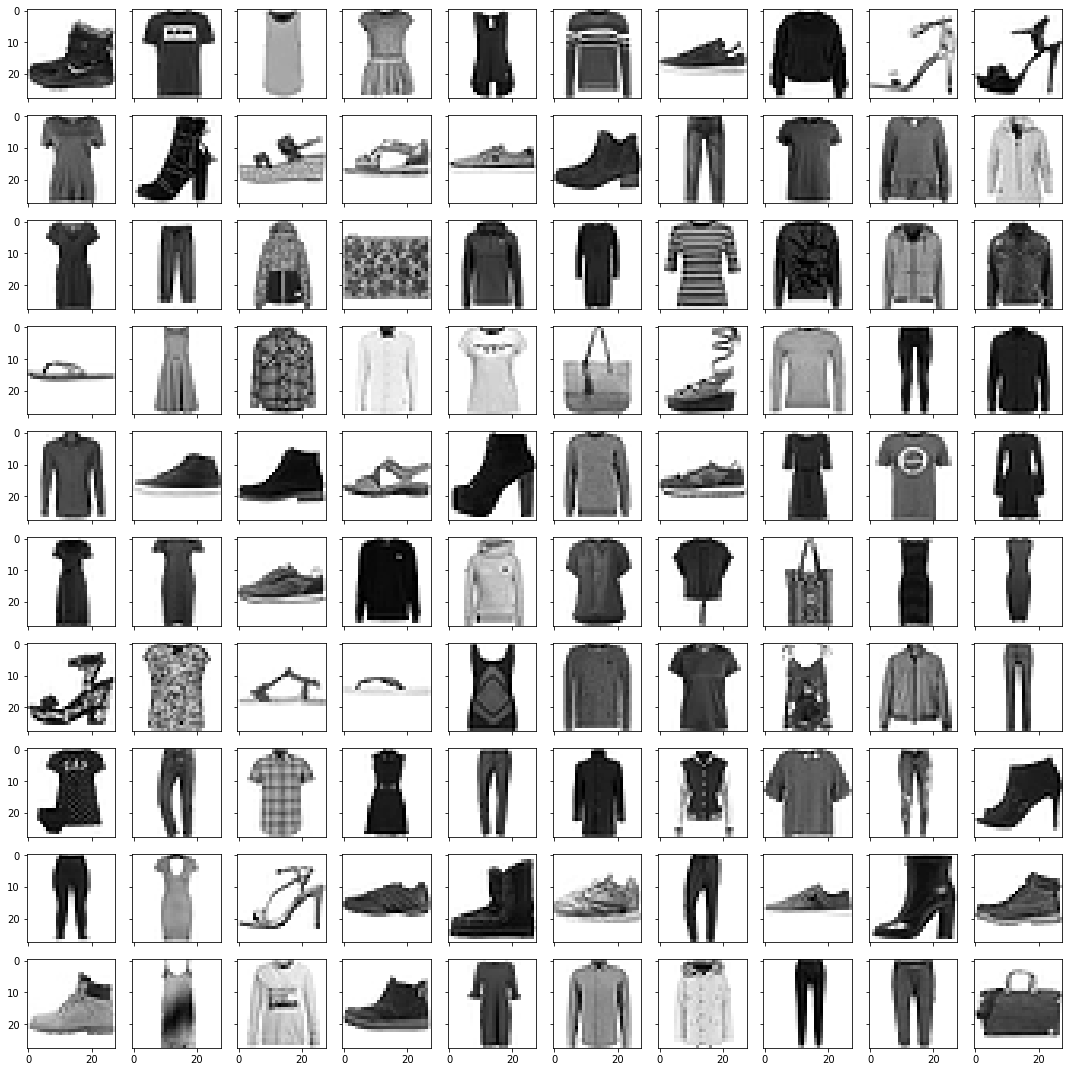

In [4]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

images_to_plot=100

plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(10,10, 
                         figsize=(15,15),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box', aspect='equal'))

for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//10
    subplot_col = i%10  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(x_train[i], (28,28))
    ax.imshow(plottable_image, cmap='gray_r')

plt.tight_layout()
plt.show()

# Single-layer perceptron

Сначала построим обычную полносвязную нейроную сеть с одним скрытым слоем.

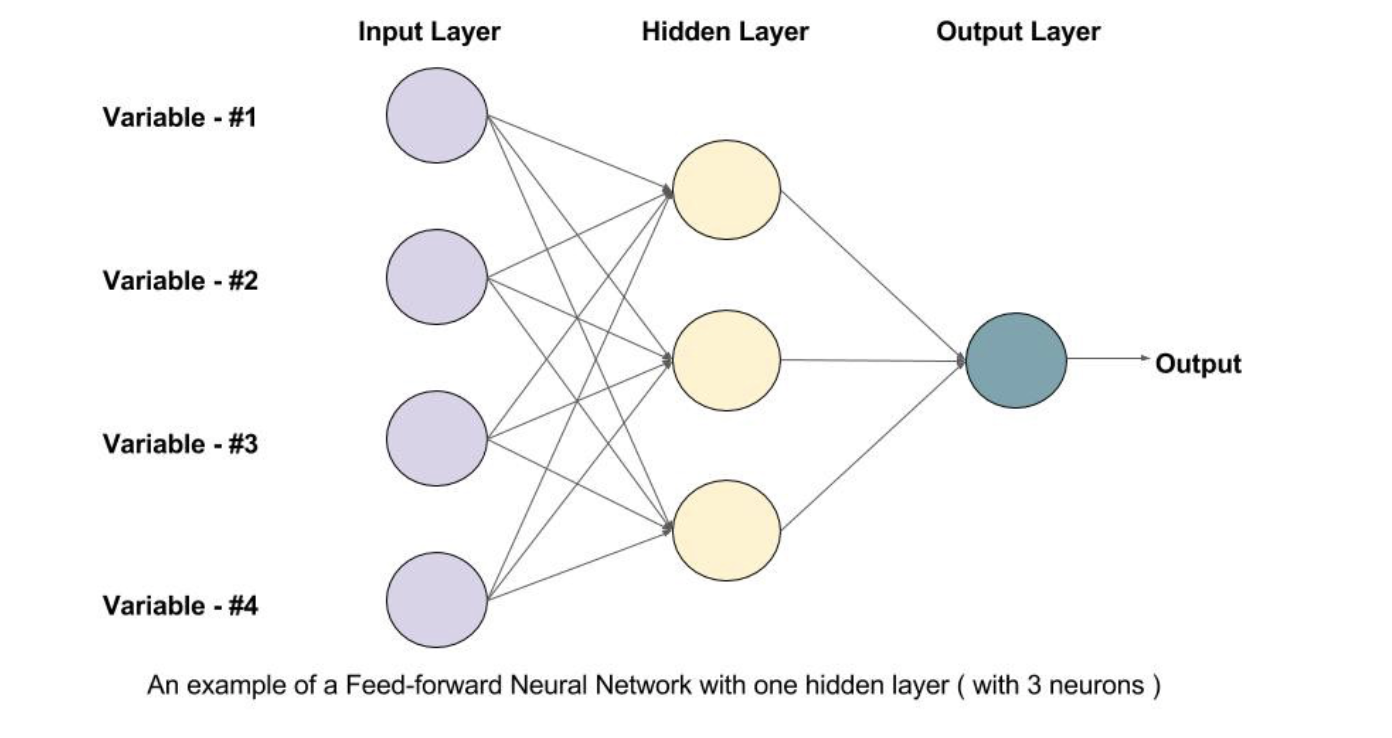

In [5]:
Image(filename='pics/Single-layer perceptron.png') 

У нас картинки 28*28, то есть двумерные.
Данная сеть принимает на вход одномерный массив, поэтому выпрямим наши двумерные массивы.

In [6]:
x_train = x_train.reshape(x_train.shape[0], -1) / 255.0
x_test = x_test.reshape(x_test.shape[0], -1) / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [7]:
x_train.shape

(60000, 784)

### Возьмем 10 скрытых нейронов.

In [43]:
model = Sequential()
model.add(Dense(10, input_dim=784, activation='relu')) #добавляет входной слой (784) и скрытый (10)
model.add(Dense(10, activation='softmax'))             #добавляет выходной слой (10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

На скрытом слое выбрана функция активации *relu* (выпрямлятель), а на выходе *softmax* (аналоги сигмоиды, только для K).

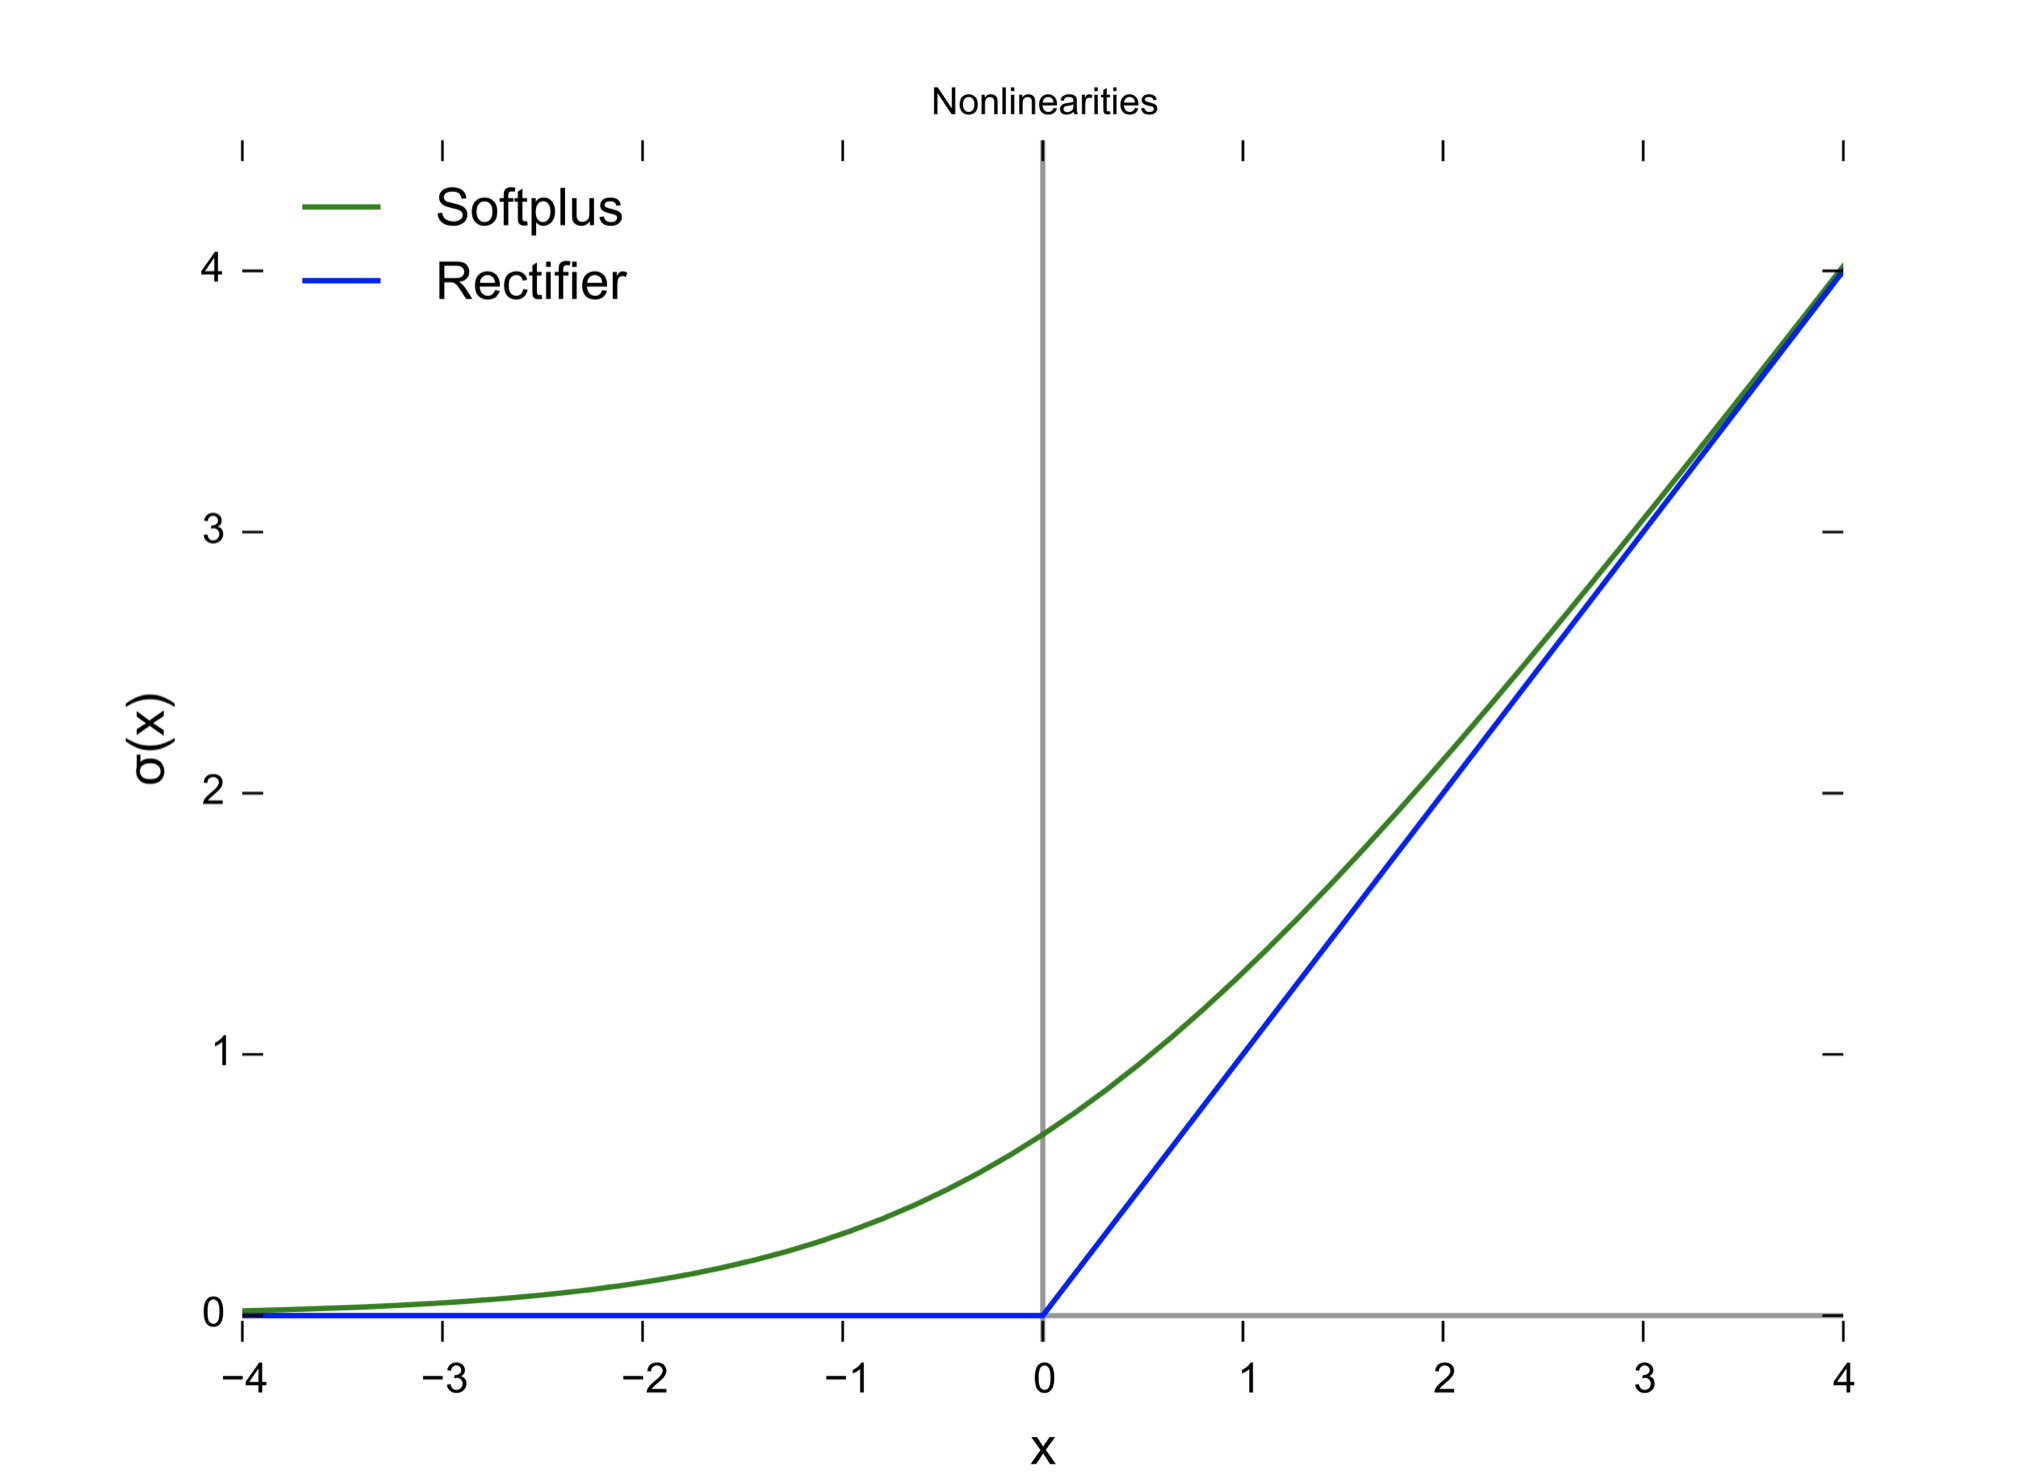

In [9]:
Image(filename='pics/relu_softmax.png')

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
Total params: 7,960
Trainable params: 7,960
Non-trainable params: 0
_________________________________________________________________


Перейдем к обучению.

In [44]:
hist=model.fit(x_train, y_train, epochs=20, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 2s 43us/sample - loss: 0.6614 - accuracy: 0.7773 - val_loss: 0.5016 - val_accuracy: 0.8240
Epoch 2/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.4740 - accuracy: 0.8372 - val_loss: 0.4468 - val_accuracy: 0.8402
Epoch 3/20
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4435 - accuracy: 0.8468 - val_loss: 0.4361 - val_accuracy: 0.8502
Epoch 4/20
54000/54000 [==============================] - 2s 39us/sample - loss: 0.4314 - accuracy: 0.8512 - val_loss: 0.4398 - val_accuracy: 0.8480
Epoch 5/20
54000/54000 [==============================] - 2s 38us/sample - loss: 0.4230 - accuracy: 0.8546 - val_loss: 0.4185 - val_accuracy: 0.8545
Epoch 6/20
54000/54000 [==============================] - 2s 40us/sample - loss: 0.4124 - accuracy: 0.8578 - val_loss: 0.4268 - val_accuracy: 0.8497
Epoch 7/20
54000/54000 [==============================] -

In [45]:
_, test_acc = model.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

В итоге на тестовых данных получили точность:

In [46]:
print(test_acc)

0.8493


Динамика точности и ошибки:

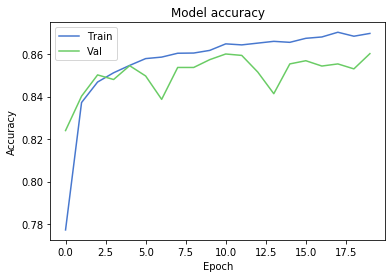

In [47]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

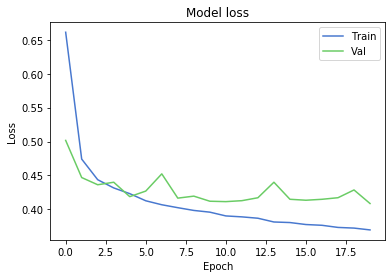

In [48]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Видим, что примерно 10 эпох было бы достаточно, так как дальше точность не растет.

Отмечу, что ошибка на Val-set для начальных эпох меньше, так как 'loss' считается путем 'обновновления' при добавлении нового элемента выборки внутри одной эпохи, а 'val_loss' считается в конце эпохи. То есть 'loss' считается в среднем на модели, оцененной не на всех элементах выборки, а 'val_loss' на всех. Поэтому в начале, когда модель еще плохо обучена, возможно (а точнее почти всегда) 'val_loss' будет меньше.

### Возьмем 50 скрытых нейронов.

In [16]:
model2 = Sequential()
model2.add(Dense(50, input_dim=784, activation='relu'))
model2.add(Dense(10, activation='softmax'))
model2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model2.summary())

hist2=model2.fit(x_train, y_train, epochs=10, validation_split=0.1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 50)                39250     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                510       
Total params: 39,760
Trainable params: 39,760
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 53us/sample - loss: 0.5352 - accuracy: 0.8159 - val_loss: 0.4561 - val_accuracy: 0.8322
Epoch 2/10
54000/54000 [==============================] - 2s 45us/sample - loss: 0.4068 - accuracy: 0.8559 - val_loss: 0.3794 - val_accuracy: 0.8590
Epoch 3/10
54000/54000 [==============================] - 2s 46us/sample - loss: 0.3687 - accuracy: 0.8694 - val_loss: 0.3694 - val_accuracy: 0.8688
Epoch 4/10


In [17]:
_, test_acc = model2.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

Получили большую точность:

In [18]:
print(test_acc)

0.8781


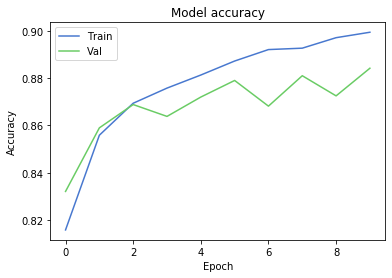

In [19]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

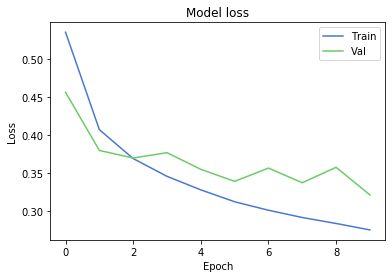

In [20]:
#Visualize the models loss
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Multi-layer perceptron

Попробуем уменьшить количество нейронов в скрытом слое, но увеличить число слоев. Возьмем 4 скрытых слоя по 40 нейронов. Таким образом, общее число параметров почти не изменилось.

In [49]:
model3 = Sequential()
model3.add(Dense(40, input_dim=784, activation='relu'))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(40, activation='relu'))
model3.add(Dense(10, activation='softmax'))
model3.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(model3.summary())

hist3=model3.fit(x_train, y_train, epochs=10, validation_split=0.1)

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_18 (Dense)             (None, 40)                31400     
_________________________________________________________________
dense_19 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_20 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_21 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_22 (Dense)             (None, 10)                410       
Total params: 36,730
Trainable params: 36,730
Non-trainable params: 0
_________________________________________________________________
None
Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 3s 6

In [50]:
_, test_acc = model3.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [51]:
print(test_acc)

0.869


Точность точность почти совпала. Можем сделать вывод, что увеличение числа слоев результата не дает.

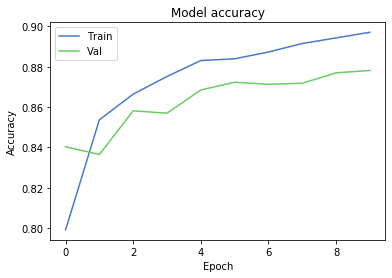

In [52]:
plt.plot(hist3.history['accuracy'])
plt.plot(hist3.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

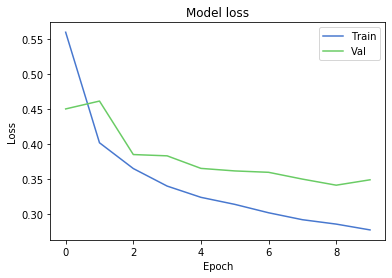

In [53]:
#Visualize the models loss
plt.plot(hist3.history['loss'])
plt.plot(hist3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

# Convolutional neural network

Перейдем к CNN.

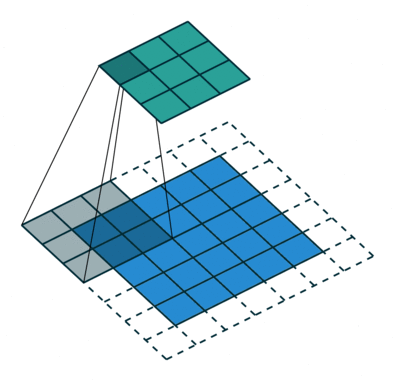

In [52]:
Image(filename='pics/CNN.gif')

Так как CNN требует формат входных данных: total_data x width x height x channels, то добавим одну размерность.

In [149]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train[:,:,:,np.newaxis] / 255.0
x_test = x_test[:,:,:,np.newaxis] / 255.0
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [150]:
x_train.shape

(60000, 28, 28, 1)

Создадим CNN: сделаем фильтр шириной 5 (квадрат), сделаем два вложения и два пулинга.

In [73]:
model4 = Sequential()

model4.add(Conv2D(filters=32, kernel_size=5,
                  strides=1, padding='valid', activation='relu', input_shape=(28,28, 1))) 
model4.add(MaxPooling2D(pool_size=2))

model4.add(Conv2D(filters=32, kernel_size=5,
                  strides=1, padding='valid', activation='relu', input_shape=(12,12, 64))) 
model4.add(MaxPooling2D(pool_size=2))

model4.add(Flatten())
model4.add(Dense(10, activation='softmax'))
model4.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [74]:
model4.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 24, 24, 32)        832       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 8, 8, 32)          25632     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 4, 4, 32)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_32 (Dense)             (None, 10)                5130      
Total params: 31,594
Trainable params: 31,594
Non-trainable params: 0
_________________________________________________

In [75]:
hist4=model4.fit(x_train, y_train, epochs=10, validation_split=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/10
54000/54000 [==============================] - 28s 516us/sample - loss: 0.5096 - accuracy: 0.8179 - val_loss: 0.3843 - val_accuracy: 0.8630
Epoch 2/10
54000/54000 [==============================] - 27s 496us/sample - loss: 0.3421 - accuracy: 0.8788 - val_loss: 0.3218 - val_accuracy: 0.8825
Epoch 3/10
54000/54000 [==============================] - 26s 488us/sample - loss: 0.3005 - accuracy: 0.8929 - val_loss: 0.3059 - val_accuracy: 0.8897
Epoch 4/10
54000/54000 [==============================] - 26s 490us/sample - loss: 0.2741 - accuracy: 0.9019 - val_loss: 0.3046 - val_accuracy: 0.8900
Epoch 5/10
54000/54000 [==============================] - 27s 503us/sample - loss: 0.2557 - accuracy: 0.9070 - val_loss: 0.2845 - val_accuracy: 0.8977
Epoch 6/10
54000/54000 [==============================] - 31s 583us/sample - loss: 0.2382 - accuracy: 0.9129 - val_loss: 0.2671 - val_accuracy: 0.9042
Epoch 7/10
54000/54000 [=====================

In [76]:
_, test_acc = model4.evaluate(x_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [77]:
print(test_acc)

0.9009


Видим, что результат получился заметно лучше, хотя общее число параметров уменьшилось.

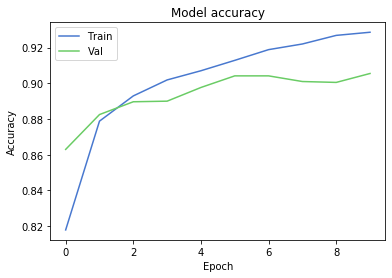

In [78]:
plt.plot(hist4.history['accuracy'])
plt.plot(hist4.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

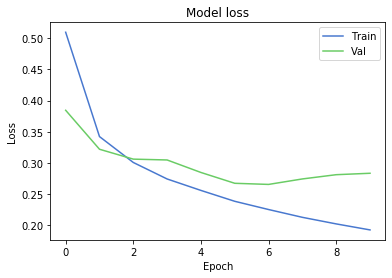

In [79]:
#Visualize the models loss
plt.plot(hist4.history['loss'])
plt.plot(hist4.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Теперь можно посмотреть на те картинки, которые CNN предсказала верно, и на те, которые неверно.

In [151]:
pred=model4.predict(x_test)
pred_round=pred#.round()

pred=np.max(pred, axis=1)
pred_round=np.argmax(pred_round, axis=1)

y_test=np.argmax(y_test, axis=1)
x_test=x_test.reshape((10000,28,28))

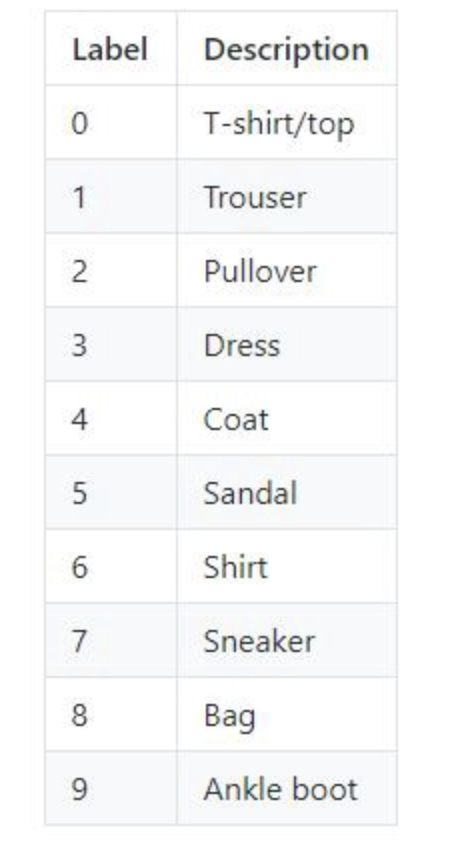

In [81]:
Image(filename='pics/pic.png',width=300) 

Сначала рассмотрим те картинки, которые были распознаны верно.

Синим обозначен класс, а красным вероятность принадлежности к этому классу.

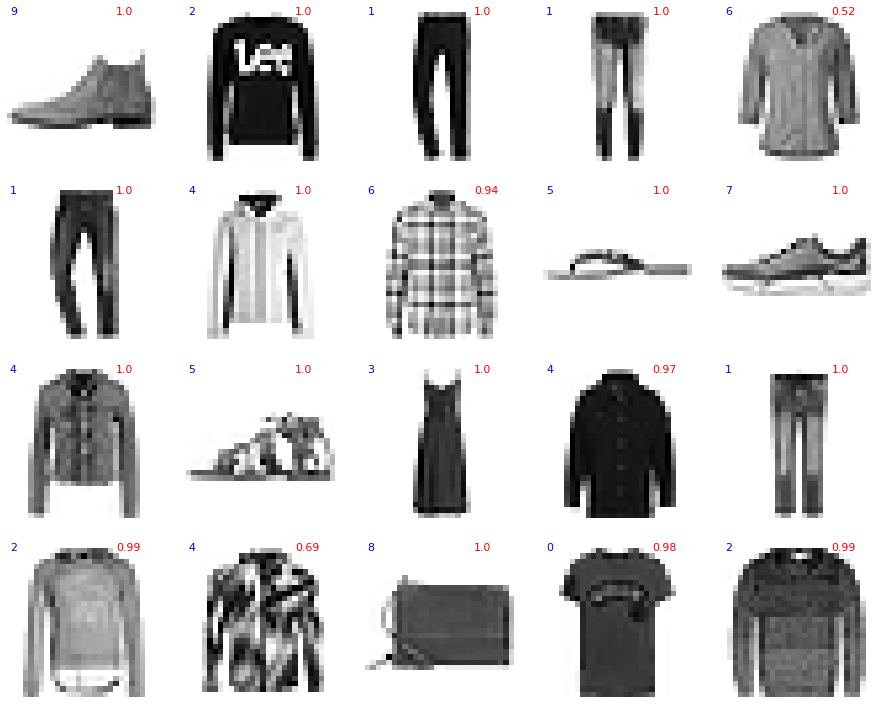

In [152]:
right=[im for im in zip(x_test, pred_round, y_test, pred) if im[1]==im[2]]

plt.figure(figsize=(12,12))
for ind, val in enumerate(right[:20]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace = 0.2, hspace = 0.2)
    plt.subplot(5,5,ind+1)
    im=val[0]
    plt.axis('off')
    plt.text(20, 0, round(val[3], 2), fontsize=11, color='red')
    plt.text(0, 0, val[2], fontsize=11, color='blue')
    plt.imshow(im, cmap='gray_r')

Теперь рассмотрим те, которые были распознаны неверно.

Зеленым обозначен истинный класс, синим тот, который предсказан, а красным вероятности пренадлежности к предсказанному классу

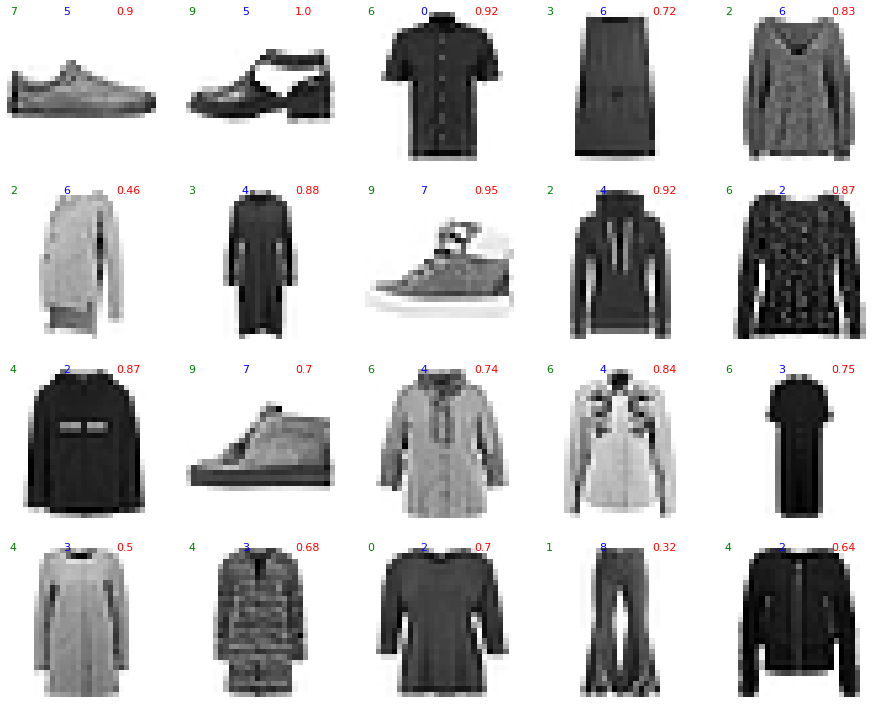

In [153]:
wrong=[im for im in zip(x_test, pred_round, y_test, pred) if im[1]!=im[2]]

plt.figure(figsize=(12,12))
for ind, val in enumerate(wrong[0:20]):
    plt.subplots_adjust(left=0, right=1, bottom=0, top=1, wspace = 0.2, hspace = 0.2)
    plt.subplot(5,5,ind+1)
    im=val[0]
    plt.axis('off')
    plt.text(20, 0, round(val[3], 2), fontsize=11, color='red')
    plt.text(0, 0, val[2], fontsize=11, color='green')
    plt.text(10, 0, val[1], fontsize=11, color='blue')
    plt.imshow(im, cmap='gray_r')

Можно построить таблицу сравнений. Видим, что модель относит много субъектов группы 6 (Shirt) в группу 0 (T-shirt/Top).

In [154]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred_round))

[[890   0  31   8   3   1  58   0   9   0]
 [  3 980   0  11   2   0   1   0   3   0]
 [ 10   1 885   8  56   0  36   0   4   0]
 [ 34   6  16 874  40   0  21   0   8   1]
 [  3   1  57  21 881   0  36   0   1   0]
 [  0   0   0   0   0 961   1  31   0   7]
 [150   1  94  18  88   1 631   0  17   0]
 [  0   0   0   0   0   6   0 986   0   8]
 [  2   0   3   0   4   2   1   5 983   0]
 [  1   0   0   0   0   5   0  56   0 938]]


# New data

In [89]:
#Load the data
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

Using TensorFlow backend.


Имеем набор картинок 32*32 (цветные).

In [90]:
#Get the shape of x_train
print('x_train shape:', x_train.shape)
#Get the shape of y_train
print('y_train shape:', y_train.shape)
#Get the shape of x_train
print('x_test shape:', x_test.shape)
#Get the shape of y_train
print('y_test shape:', y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


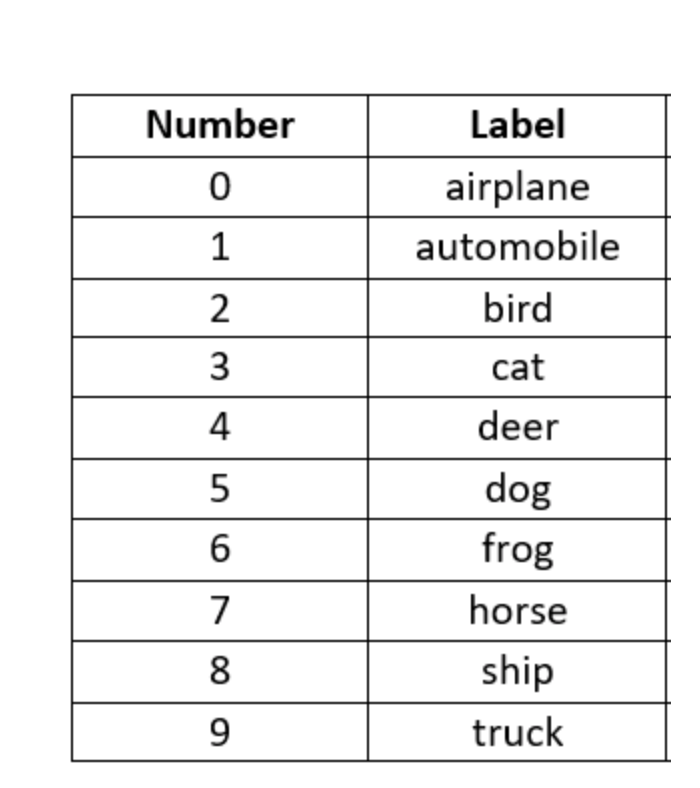

In [91]:
from IPython.display import Image
Image(filename='pics/pic1.png',width=300) 

<Figure size 432x288 with 0 Axes>

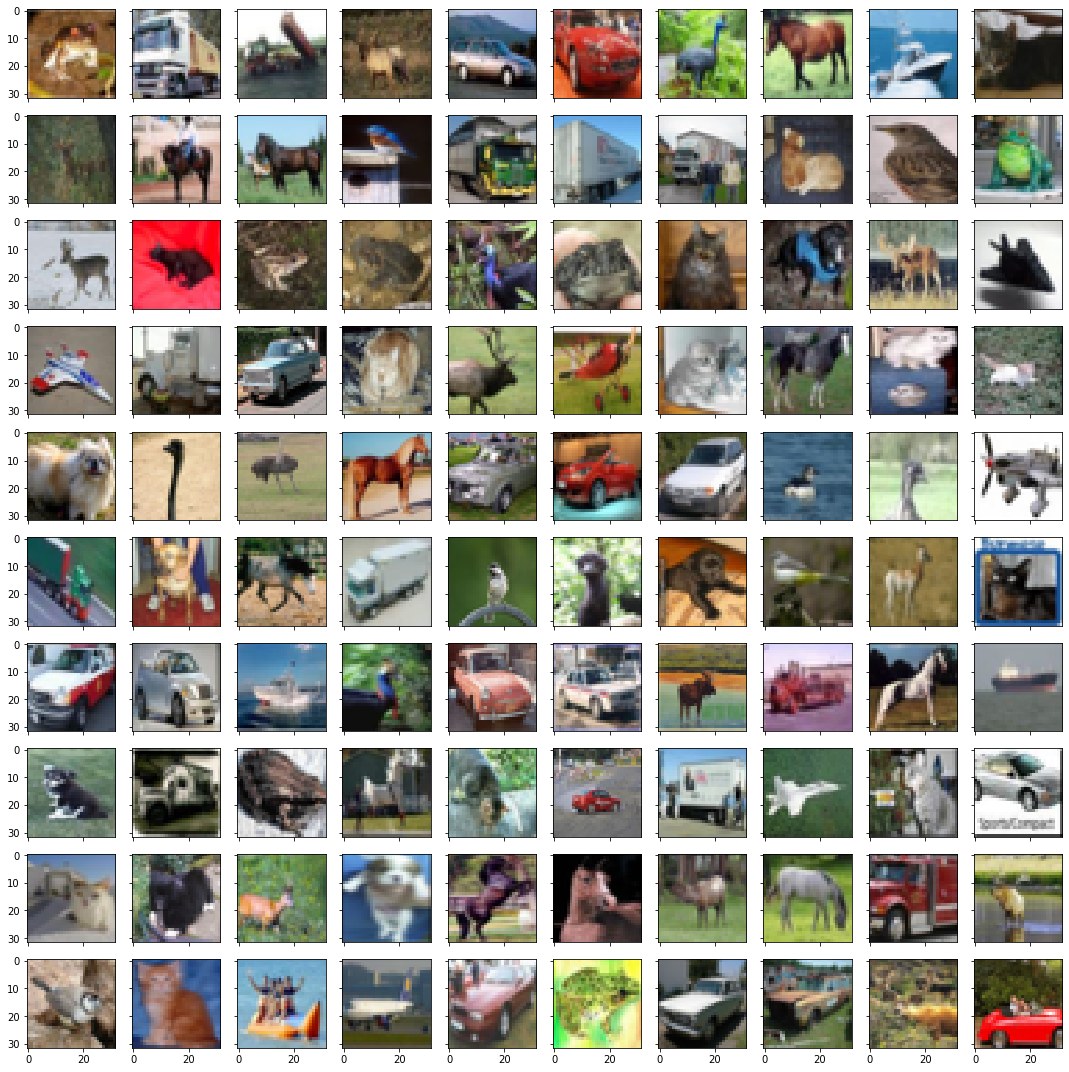

In [92]:
from matplotlib import pyplot as plt
%matplotlib inline
import numpy as np

images_to_plot=100

plt.clf()
plt.style.use('seaborn-muted')

fig, axes = plt.subplots(10,10, 
                         figsize=(15,15),
                         sharex=True, sharey=True,
                         subplot_kw=dict(adjustable='box', aspect='equal'))

for i in range(images_to_plot):
    
    # axes (subplot) objects are stored in 2d array, accessed with axes[row,col]
    subplot_row = i//10
    subplot_col = i%10  
    ax = axes[subplot_row, subplot_col]

    # plot image on subplot
    plottable_image = np.reshape(x_train[i], (32,32,3))
    ax.imshow(plottable_image)

plt.tight_layout()
plt.show()

In [93]:
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)
y_test_one_hot = to_categorical(y_test)

Нормализируем.

In [94]:
x_train = x_train / 255
x_test = x_test / 255

Создаем сеть.

In [95]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
model = Sequential()

Добавляем слои.

In [96]:
model.add(Conv2D(32, (5, 5), activation='relu', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(1000, activation='relu'))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [97]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1000)              1601000   
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

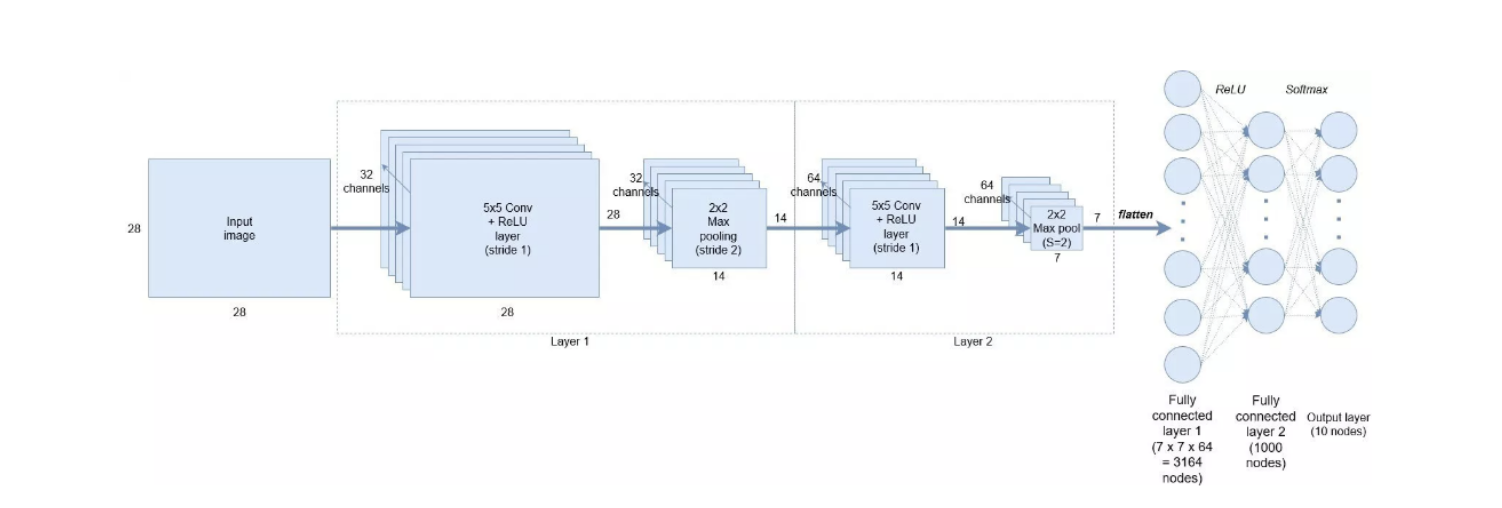

In [98]:
Image(filename='pics/CNN.png') 

In [99]:
hist = model.fit(x_train, y_train_one_hot, 
           epochs=10, validation_split=0.1 )

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 93s 2ms/step - loss: 1.4844 - accuracy: 0.4615 - val_loss: 1.2060 - val_accuracy: 0.5758
Epoch 2/10
45000/45000 [==============================] - 88s 2ms/step - loss: 1.1559 - accuracy: 0.5945 - val_loss: 1.1129 - val_accuracy: 0.6128
Epoch 3/10
45000/45000 [==============================] - 88s 2ms/step - loss: 0.9856 - accuracy: 0.6532 - val_loss: 1.0311 - val_accuracy: 0.6504
Epoch 4/10
45000/45000 [==============================] - 91s 2ms/step - loss: 0.8396 - accuracy: 0.7063 - val_loss: 0.9762 - val_accuracy: 0.6696
Epoch 5/10
45000/45000 [==============================] - 98s 2ms/step - loss: 0.7013 - accuracy: 0.7543 - val_loss: 0.9796 - val_accuracy: 0.6820
Epoch 6/10
45000/45000 [==============================] - 127s 3ms/step - loss: 0.5641 - accuracy: 0.8013 - val_loss: 1.0294 - val_accuracy: 0.6810
Epoch 7/10
45000/45000 [==============================] - 121s 3ms/s

In [100]:
model.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 3s 341us/step


0.6547999978065491

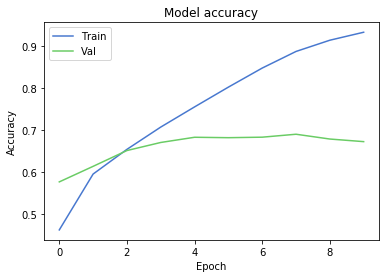

In [101]:
#Visualize the models accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

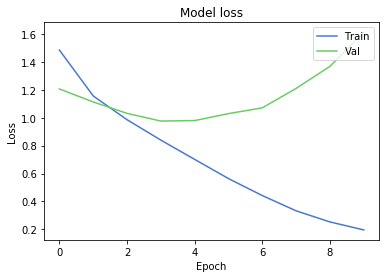

In [102]:
#Visualize the models loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

Видим, что модель получилась сложной и переобучилась.

Поменяем модель.

In [106]:
model1 = Sequential()
model1.add(Conv2D(32, (5, 5),strides=1, padding='valid',  activation='relu', input_shape=(32,32,3)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Conv2D(32, (5, 5), strides=1, padding='valid', activation='relu'))
#model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
#model1.add(Dense(1000, activation='relu'))
model1.add(Dense(10, activation='softmax'))
model1.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

In [107]:
print(model1.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 10, 10, 32)        25632     
_________________________________________________________________
flatten_3 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 10)                32010     
Total params: 60,074
Trainable params: 60,074
Non-trainable params: 0
_________________________________________________________________
None


In [108]:
hist1 = model1.fit(x_train, y_train_one_hot, 
           epochs=10, validation_split=0.1 )

Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 50s 1ms/step - loss: 1.5800 - accuracy: 0.4292 - val_loss: 1.3651 - val_accuracy: 0.5094
Epoch 2/10
45000/45000 [==============================] - 53s 1ms/step - loss: 1.3009 - accuracy: 0.5392 - val_loss: 1.2143 - val_accuracy: 0.5742
Epoch 3/10
45000/45000 [==============================] - 59s 1ms/step - loss: 1.1704 - accuracy: 0.5874 - val_loss: 1.1205 - val_accuracy: 0.6158
Epoch 4/10
45000/45000 [==============================] - 55s 1ms/step - loss: 1.0949 - accuracy: 0.6172 - val_loss: 1.0858 - val_accuracy: 0.6222
Epoch 5/10
45000/45000 [==============================] - 52s 1ms/step - loss: 1.0490 - accuracy: 0.6356 - val_loss: 1.0519 - val_accuracy: 0.6402
Epoch 6/10
45000/45000 [==============================] - 54s 1ms/step - loss: 1.0017 - accuracy: 0.6508 - val_loss: 1.0565 - val_accuracy: 0.6318
Epoch 7/10
45000/45000 [==============================] - 55s 1ms/ste

In [109]:
model1.evaluate(x_test, y_test_one_hot)[1]

10000/10000 [==============================] - 2s 220us/step


0.6492999792098999

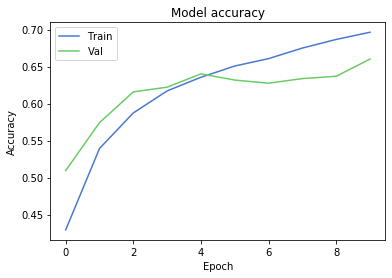

In [110]:
#Visualize the models accuracy
plt.plot(hist1.history['accuracy'])
plt.plot(hist1.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

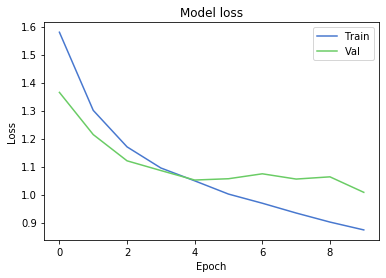

In [111]:
#Visualize the models loss
plt.plot(hist1.history['loss'])
plt.plot(hist1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

В итоге построили намного проще модель, но которая дает такие же результаты.

Посмотрим, кого с кем путает модель.

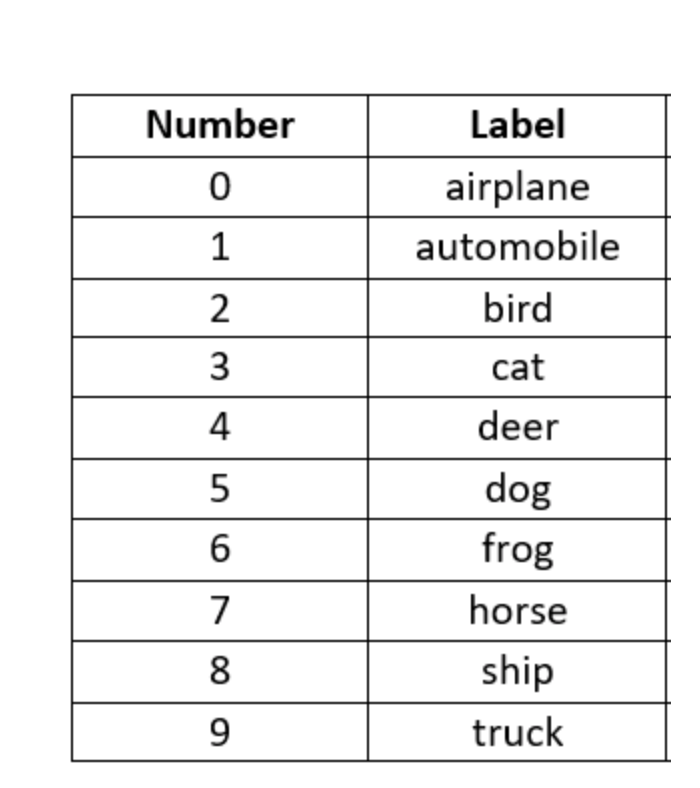

In [112]:
from IPython.display import Image
Image(filename='pics/pic1.png',width=300) 

In [146]:
pred=model1.predict(x_test)
pred_round=pred#.round()

pred=np.max(pred, axis=1)
pred_round=np.argmax(pred_round, axis=1)

print(confusion_matrix(y_test, pred_round))

[[691  53  57  18  41  10  14  21  61  34]
 [ 17 847   7  14  10   6  11   8  24  56]
 [ 80  14 445  49 154  86  91  61  10  10]
 [ 19  22  70 441  99 186  84  50  14  15]
 [ 22   6  48  66 639  42  67  92  16   2]
 [ 15  10  54 194  65 531  37  80   7   7]
 [  4  13  44  70  30  30 781  14   5   9]
 [ 15   7  32  34  89  74  13 719   2  15]
 [ 92  80  13  17  15  13   6  11 726  27]
 [ 38 161   9  26  10  17  16  28  22 673]]
